Install Numpy-stl library


In [7]:
!pip3 install numpy-stl

Quick Start

In [8]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

Read image from file

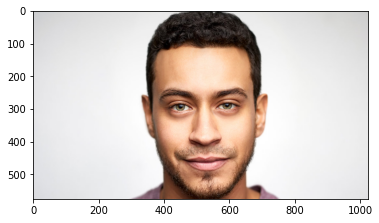

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("image.jpg")
im.show() 
plt.imshow(im)

Convert image to grey scale

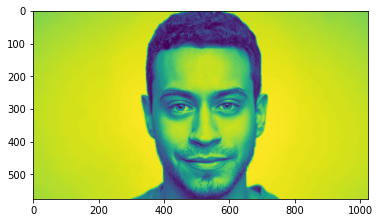

In [10]:
grey_img = Image.open('image.jpg').convert('L')
plt.imshow(grey_img)

 Creating simple 2D square surface with 2 triangles

In [11]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1]])

# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0]
])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('surface.stl')

Creating surface 500 x 1000 with N triangels

In [12]:
grey_img = Image.open('image.jpg').convert('L')

max_size=(500,500)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('object.stl')
print(surface)

[[204 204 204 ... 203 202 202]
 [204 204 204 ... 203 203 202]
 [205 205 205 ... 204 203 203]
 ...
 [219 219 219 ... 226 226 226]
 [219 219 219 ... 226 226 226]
 [218 218 218 ... 226 226 226]]
number of faces: 279440


In [13]:
!ls -alh /content

total 14M
drwxr-xr-x 1 root root 4.0K Mar 25 18:30 .
drwxr-xr-x 1 root root 4.0K Mar 25 18:25 ..
drwxr-xr-x 4 root root 4.0K Mar 18 13:36 .config
-rw-r--r-- 1 root root  684 Mar 25 18:29 cube.stl
-rw-r--r-- 1 root root  51K Mar 25 18:29 image.jpg
-rw-r--r-- 1 root root  14M Mar 25 18:30 object.stl
drwxr-xr-x 1 root root 4.0K Mar 18 13:36 sample_data
-rw-r--r-- 1 root root  184 Mar 25 18:29 surface.stl
